In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


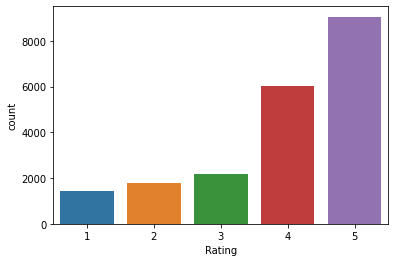

In [ ]:
sns.countplot(x= df['Rating'])

In [ ]:
import csv
df = pd.read_csv('tripadvisor_hotel_reviews.csv',  encoding='utf-8')

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
df['scores'] = df['Review'].apply(lambda hotel_overview: sid.polarity_scores(str(hotel_overview)))
df.head()

,Review,Rating,scores
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co..."
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com..."
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp..."
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com..."
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co..."


In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df.head()

,Review,Rating,scores,compound,sentiment_type
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747,POSITIVE
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,POSITIVE
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,POSITIVE
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,POSITIVE
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,POSITIVE


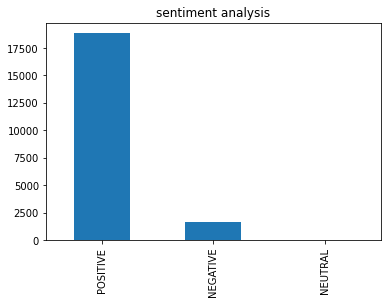

In [ ]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [ ]:
data = df[['Review','sentiment_type','compound', 'Rating']]
data

,Review,sentiment_type,compound,Rating
0,nice hotel expensive parking got good deal sta...,POSITIVE,0.9747,4
1,ok nothing special charge diamond member hilto...,POSITIVE,0.9787,2
2,nice rooms not 4* experience hotel monaco seat...,POSITIVE,0.9889,3
3,"unique, great stay, wonderful time hotel monac...",POSITIVE,0.9912,5
4,"great stay great stay, went seahawk game aweso...",POSITIVE,0.9797,5
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",POSITIVE,0.9834,5
20487,great location price view hotel great quick pl...,POSITIVE,0.9753,4
20488,"ok just looks nice modern outside, desk staff ...",POSITIVE,0.2629,2
20489,hotel theft ruined vacation hotel opened sept ...,POSITIVE,0.9867,1


In [ ]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
train, test = train_test_split(data,test_size = 0.1)

In [ ]:
train = train[train.sentiment_type != "NEUTRAL"]

Positive words


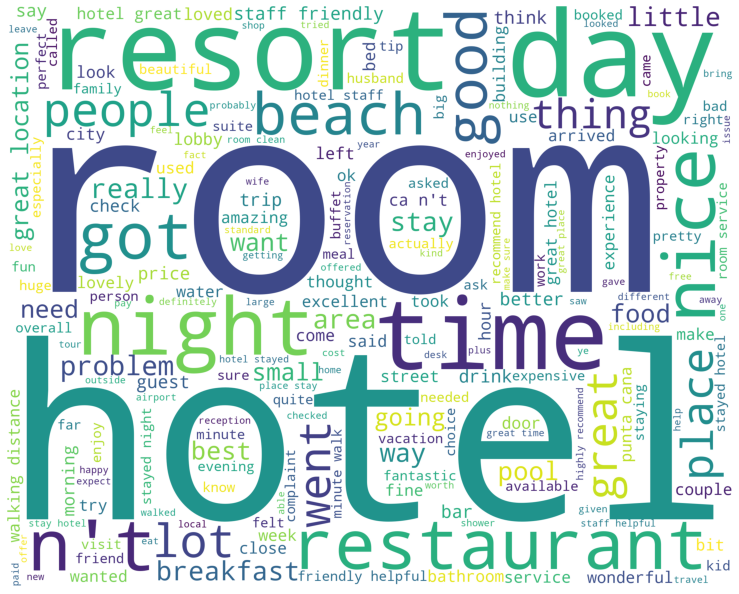

Negative words


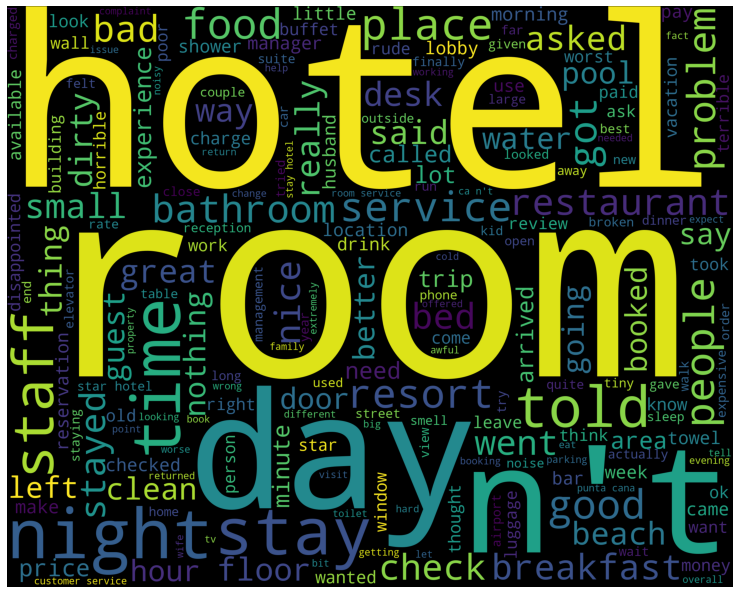

In [ ]:
train_pos = train[ train['sentiment_type'] == 'POSITIVE']
train_pos = train_pos['Review']
train_neg = train[ train['sentiment_type'] == 'NEGATIVE']
train_neg = train_neg['Review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
data.head()

,Review,sentiment_type,compound,Rating
0,nice hotel expensive parking got good deal sta...,POSITIVE,0.9747,4
1,ok nothing special charge diamond member hilto...,POSITIVE,0.9787,2
2,nice rooms not 4* experience hotel monaco seat...,POSITIVE,0.9889,3
3,"unique, great stay, wonderful time hotel monac...",POSITIVE,0.9912,5
4,"great stay great stay, went seahawk game aweso...",POSITIVE,0.9797,5


In [ ]:
pip install --upgrade pycaret-nightly

     |████████████████████████████████| 312 kB 8.5 MB/s 
     |████████████████████████████████| 167 kB 42.6 MB/s 
     |████████████████████████████████| 1.3 MB 47.9 MB/s 
     |████████████████████████████████| 15.6 MB 44.9 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 38.5 MB/s 
     |████████████████████████████████| 114 kB 52.2 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 1.7 MB 33.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 48.9 MB/s 
     |████████████████████████████████| 2.0 MB 47.7 MB/s 
     |████████████████████████████████| 636 kB 68.0 MB/s 
     |████████████████████████████████| 303 kB 55.2 MB/s 
     |████████████████████████████████| 3.1 MB 54.7 MB/s 
     |█████████████████

In [ ]:
from pycaret.nlp import *
exp_name = setup(data = data, target = 'Review')

Description,Value
session_id,8883
Documents,20491
Vocab Size,32301
Custom Stopwords,False


In [ ]:
lda = create_model('lda', num_topics = 6, multi_core = True)

In [ ]:
lda_top = assign_model(lda)
lda_top.head()

,Review,sentiment_type,compound,Rating,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,nice hotel expensive parking get good deal sta...,POSITIVE,0.9747,4,0.002306,0.820184,0.002315,0.170589,0.002301,0.002306,Topic 1,0.82
1,special charge decide chain shoot anniversary ...,POSITIVE,0.9787,2,0.000952,0.400854,0.042122,0.048549,0.000951,0.506572,Topic 5,0.51
2,nice room experience hotel hotel level positiv...,POSITIVE,0.9889,3,0.246066,0.352693,0.083662,0.067701,0.001147,0.248731,Topic 1,0.35
3,unique great stay wonderful time location exce...,POSITIVE,0.9912,5,0.144804,0.257069,0.497002,0.002452,0.096237,0.002437,Topic 2,0.50
4,great stay great stay go seahawk game building...,POSITIVE,0.9797,5,0.001178,0.383816,0.001179,0.258418,0.067936,0.287473,Topic 1,0.38


In [ ]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [ ]:
plot_model(lda,'topic_model')


In [ ]:
save_model(lda,'Final LDA Model 07212020')